Name : W. K. D. D. Senuruk  
## Pre Understanding for Image Processing

In [1]:
for i in range(1,6):
    print(i, ':', (i)**(2))

1 : 1
2 : 4
3 : 9
4 : 16
5 : 25


In [2]:
import sympy
for i in range(1,6):
    if not sympy.isprime(i):
        print(i, ':', (i)**(2))

1 : 1
4 : 16


#### Using Comprehensions to do above tasks

In [3]:
ans = [i**(2) for i in range(1, 6)]
print(ans)

[1, 4, 9, 16, 25]


In [5]:
ans = [i**(2) for i in range(1,6) if not sympy.isprime(i)]
print(ans)

[1, 16]


#### Matric Multiplication using numpy

In [6]:
import numpy as np
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([[7, 8, 9, 1], [1, 2, 3, 4]])
C = np.matmul(A, B)
print(C)

[[ 9 12 15  9]
 [25 32 39 19]
 [41 52 63 29]]


#### Element-wise mutiplication using numpy

In [7]:
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([[3, 2], [5, 4], [3, 1]])
D = np.multiply(A, B)
print(D)


[[ 3  4]
 [15 16]
 [15  6]]


#### Generating a random integer matrix and extracting a sub array

In [23]:
E = np.random.rand(5, 7)
F = 10 * E
for i in range(5):
    for j in range(7):
        F[i][j] = round(F[i][j])
F = F.astype(int)
print(F,'\n')
G = F[1:4, :2]
print(G, '\n')
print('Size of the Resulting Array : ', G.shape)

[[ 8  8  1  8 10  2  0]
 [ 9  1  4  8  5  8  5]
 [ 8 10  7  7  4  9  4]
 [ 5  8  2  6  2  1  4]
 [ 1  2  3 10  0  7  2]] 

[[ 9  1]
 [ 8 10]
 [ 5  8]] 

Size of the Resulting Array :  (3, 2)


#### Broadcasting

In [24]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([10, 100])
z = np.array([10, 100, 1000])
k = 10
print('multiply a matrix by a constant')
print(x * k)
print('\nAdd a vector to each row')
print(x + z)
print('\nAdd a vector to each column')
print(x + np.reshape(y, (2, 1)))

multiply a matrix by a constant
[[10 20 30]
 [40 50 60]]

Add a vector to each row
[[  11  102 1003]
 [  14  105 1006]]

Add a vector to each column
[[ 11  12  13]
 [104 105 106]]


#### Playing with Matrices

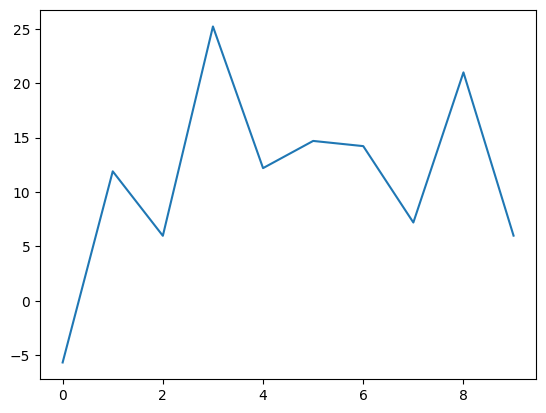

Matrix X
[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]]


In [30]:
import matplotlib.pyplot as plt

m, c = 2, -4
N = 10
x = np.linspace(0, N - 1, N).reshape(N, 1)
sigma = 10

y = m*x + c + np.random.normal(0, sigma, (N, 1))
plt.plot(x, y)
plt.show()

X = np.append(np.ones((N, 1)), x, axis = 1)
print("Matrix X")
print(X)

In [31]:
ans = np.linalg.inv(X.T @ X) @ X.T @ y
print(ans)

[[7.33581732]
 [0.87380552]]


#### Hyperbolic estimate of the square root as the initial guess

In [33]:
def sqrt_hyper_est(s):
    if s > 100:
        a = "{:e}".format(s)
        idx = a.index('+')
        n = int(float(a[idx + 1:]))
        if n % 2 == 0:
            a = float(a[:idx - 1])
        else:
            n = n - 1
            a = float(a[:idx - 1]) * 10
        sqrtS = (((-190)/(a + 20)) + 10) * 10**(n//2)
    else:
        sqrtS = (((-190)/(s + 20)) + 10) * 10**(0)

    return sqrtS

#### Newton-Raphson method

The Newton-Raphson iteration formula is:

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

For finding the square root of a number \( s \), we define:

$$
f(x) = x^2 - s \quad \text{and} \quad f'(x) = 2x
$$

So the iteration becomes:

$$
x_{n+1} = x_n - \frac{x_n^2 - s}{2x_n} = \frac{1}{2}\left(x_n + \frac{s}{x_n}\right)
$$


In [40]:
def sqrt_new_rap(s):
    x = sqrt_hyper_est(s)
    tolerance = 1e-5
    epsilon = 1e-14
    maxIterations = 20
    solutionFound = False

    iterations = [x]

    for i in range(maxIterations):
        y = x**(2) - s
        yp = 2*x
        if abs(yp) < epsilon:
            break
        xx = x - y/yp
        iterations.append(xx)
        if abs(xx - x) <= tolerance:
            solutionFound = True
            break
        x = xx

    if solutionFound == True:
        print('Square root of', s, 'is', xx)
    else:
        print('Not converging')
    
    return iterations


#### Computing square roots with Newton-Raphson method using hyperbolic estimate as the initial guess

In [46]:
print('_____________________Square roots for a precision of 0.00001_____________________\n')

print(sqrt_new_rap(64), '\n')
print(sqrt_new_rap(75), '\n')
print(sqrt_new_rap(100), '\n')
print(sqrt_new_rap(1600), '\n')

_____________________Square roots for a precision of 0.00001_____________________

Square root of 64 is 8.000000000000094
[7.738095238095238, 8.004432234432235, 8.000001227114021, 8.000000000000094] 

Square root of 75 is 8.660254037844386
[8.0, 8.6875, 8.660296762589928, 8.660254037949775, 8.660254037844386] 

Square root of 100 is 10.0
[8.416666666666666, 10.148927392739274, 10.001092695190824, 10.000000059692617, 10.0] 

Square root of 1600 is 40.0
[47.22222222222222, 40.552287581699346, 40.00376084298925, 40.00000017678263, 40.0] 



Square root of 256 is 16.00000000000034


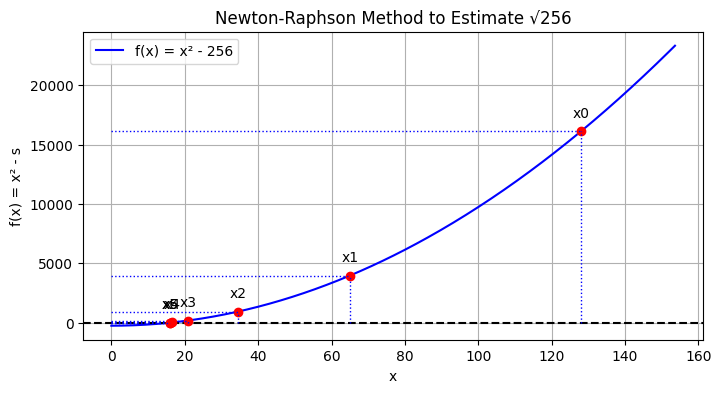

In [56]:
import matplotlib.pyplot as plt
import numpy as np

s = 256
iterations = sqrt_new_rap(s)

x_vals = np.linspace(0, max(iterations)*1.2, 400)
y_vals = x_vals**2 - s

plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals, label=f'f(x) = x² - {s}', color='blue')
plt.axhline(0, color='black', linestyle='--')

# Plot the tangent lines
for i in range(len(iterations) - 1):
    x_i = iterations[i]
    y_i = x_i**2 - s
    slope = 2 * x_i
    x_tangent = np.linspace(x_i - 1, x_i + 1, 10)
    y_tangent = y_i + slope * (x_tangent - x_i)
    plt.plot(x_tangent, y_tangent, '--', color='orange', alpha=0.6)

    # Plot point
    plt.plot(x_i, y_i, 'ro')
    plt.annotate(f'x{i}', (x_i, y_i), textcoords="offset points", xytext=(0, 10), ha='center')

    # Short dotted lines from axes to point
    plt.plot([x_i, x_i], [0, y_i], linestyle=':', color='blue', linewidth=1)  # vertical
    plt.plot([0, x_i], [y_i, y_i], linestyle=':', color='blue', linewidth=1)  # horizontal

plt.title(f"Newton-Raphson Method to Estimate √{s}")
plt.xlabel("x")
plt.ylabel("f(x) = x² - s")
plt.legend()
plt.grid(True)
plt.show()

#### Gaussian smoothing to filter the noise

in opencv the color space is --> BGR  
in matplotlib the color space is --> RGB

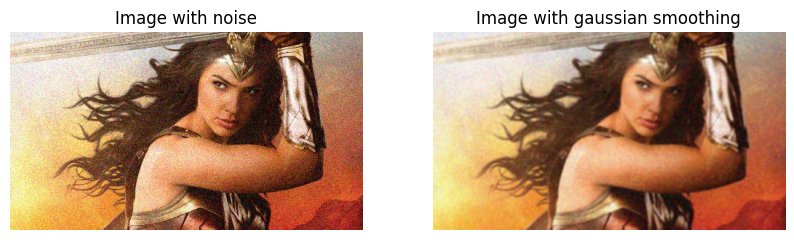

In [78]:
import cv2 as cv

img = cv.imread(r'./Images/gal_gaussian.png')
gBlur = cv.GaussianBlur(img, (5, 5), 0)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Image with noise')
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(gBlur, cv.COLOR_BGR2RGB))
ax[1].set_title('Image with gaussian smoothing')
ax[1].axis('off')
plt.show()

#### Median filtering to filter the salt and pepper noise

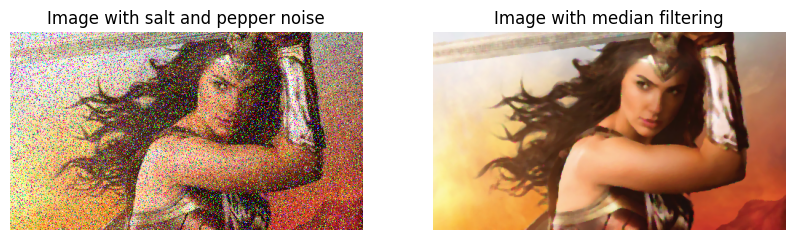

In [80]:
img = cv.imread(r'./Images/gal_sandp.png')
mBlur = cv.medianBlur(img, 5)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Image with salt and pepper noise')
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(mBlur, cv.COLOR_BGR2RGB))
ax[1].set_title('Image with median filtering')
ax[1].axis('off')
plt.show()

#### Changing the color of the top right quarter of a grayscale image

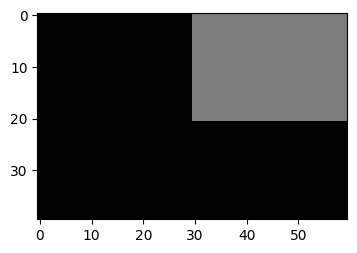

In [84]:
img = np.zeros((40, 60), dtype = np.uint8)
img[0:21, 30:61] = 125
fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

#### Changing the color of the bottom left quarter of a color image

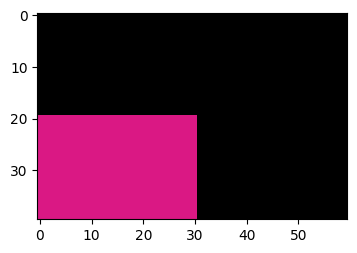

In [90]:
img = np.zeros((40, 60, 3), dtype = np.uint8)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img[20:41,0:31] = (218, 24, 132) # Barbie Pink
fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(img, cmap = 'brg')
plt.show()

#### Increasing brightness of a dark image using HSV color space

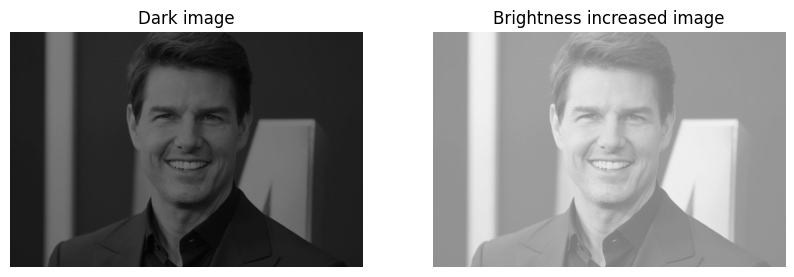

In [96]:
img = cv.imread(r'./Images/tom_dark.jpg')
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
for x in range(0, len(hsv)):
    for y in range(0, len(hsv[0])):
        hsv[x, y][2] += 120
new_img = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title('Dark image')
ax[0].axis('off')
ax[1].imshow(new_img)
ax[1].set_title('Brightness increased image')
ax[1].axis('off')
plt.show()